In [2]:

import xarray as xr
import cdsapi
import eccodes
import cfgrib
import os
import timeit
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

c:\Users\prote\AppData\Local\Programs\Python\Python311\Lib\site-packages\gribapi\__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.27.0
  warnings.warn(


In [3]:

cdsapi_key = '277879:f4f597cd-34b3-42c6-bd25-ac7e1da63a9c'
c = cdsapi.Client(key=cdsapi_key)

# Download the Dataset

In [3]:

folder_nc = '.'  
#downloaded_file = 'ERA5-Land_monthly_averaged_7_variables_1990-2022_global.nc'

print('Process started. Please wait for the ending message...')
start = timeit.default_timer()
c = cdsapi.Client()

# Define the list of variables to download
variables_list = ['total_precipitation', '2m_temperature']

# Loop over each variable and download in GRIB format
for variable in variables_list:
    c.retrieve(
        'reanalysis-era5-land-monthly-means',
        {
            'format': 'grib',
            'product_type': 'monthly_averaged_reanalysis',
            'variable': variable,
            'year': [str(year) for year in range(2000, 2022)],
            'month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],
            'time': '00:00',
            'area': [-25, 35, 45, 70],  # Europe bounding box
        },
        os.path.join(folder_nc, f'ERA5-Land_{variable}_2000-2022_europe.grib')
    )

stop = timeit.default_timer()
print('Process completed in ', (stop - start) / 60, ' minutes')


Process started. Please wait for the ending message...


2024-01-26 12:58:29,946 INFO Welcome to the CDS
2024-01-26 12:58:29,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means
2024-01-26 12:58:30,071 INFO Request is queued
2024-01-26 13:04:49,238 INFO Request is completed
2024-01-26 13:04:49,238 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data1/adaptor.mars.internal-1706270380.652404-2725-1-422e8eb7-530f-4b41-a726-853591d86ee7.grib to .\ERA5-Land_total_precipitation_2000-2022_europe.grib (96.5M)
2024-01-26 13:05:18,286 INFO Download rate 3.3M/s   
2024-01-26 13:05:18,429 INFO Welcome to the CDS
2024-01-26 13:05:18,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means
2024-01-26 13:05:18,571 INFO Request is queued
2024-01-26 13:35:41,311 INFO Request is running
2024-01-26 13:39:41,921 INFO Request is completed
2024-01-26 13:39:41,922 INFO Downloading https://download-0015-cl

Process completed in  41.62401512999998  minutes


In [4]:
# Extract data for only the temperature variable
folder_nc = '.'  

print('Process started. Please wait for the ending message...')
start = timeit.default_timer()
c = cdsapi.Client()


variables_list = ['2m_temperature']


for variable in variables_list:
    c.retrieve(
        'reanalysis-era5-land-monthly-means',
        {
            'format': 'grib',
            'product_type': 'monthly_averaged_reanalysis',
            'variable': variable,
            'year': [str(year) for year in range(2000, 2022)],
            'month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],
            'time': '00:00',
            'area': [25, -25, 75, 45],  # Europe bounding box
        },
        os.path.join(folder_nc, f'ERA5-Land_{variable}_2000-2022_europe_2.grib')
    )

stop = timeit.default_timer()
print('Process completed in ', (stop - start) / 60, ' minutes')

Process started. Please wait for the ending message...


2024-01-26 13:43:46,513 INFO Welcome to the CDS
2024-01-26 13:43:46,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means
2024-01-26 13:43:46,629 INFO Request is queued
2024-01-26 21:15:57,217 INFO Request is completed
2024-01-26 21:15:57,218 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/adaptor.mars.internal-1706275483.0240886-4464-9-cc5b57ae-d857-4afe-9252-12abb430a60e.grib to .\ERA5-Land_2m_temperature_2000-2022_europe_2.grib (97.5M)
2024-01-26 21:16:40,525 INFO Download rate 2.3M/s   


Process completed in  452.9135765416667  minutes


In [4]:
#check to ensure data has been downloaded correctly and is complete
def check_file_integrity(file_path, min_size_kb=10):
    if os.path.exists(file_path):
        file_size = os.path.getsize(file_path) / 1024  # size in KB
        if file_size > min_size_kb:
            print(f"File {file_path} is valid with size {file_size} KB.")
        else:
            print(f"File {file_path} may be corrupted or incomplete.")
    else:
        print(f"File {file_path} does not exist.")

# Exploring the Total Precipitation Data set

In [5]:

grib_file_path = "E:/tu ilmenau/WS 24/Research Project/progress/ERA5-Land_total_precipitation_2000-2022_europe.grib"
check_file_integrity(grib_file_path)

# Open the GRIB file using xarray with a specific filter
ds = xr.open_dataset(grib_file_path, engine='cfgrib', filter_by_keys={'stepType': 'avgas'})

# ds is the Xarray Dataset containing all variables from the GRIB file
print(ds)

Ignoring index file 'E:/tu ilmenau/WS 24/Research Project/progress/ERA5-Land_total_precipitation_2000-2022_europe.grib.923a8.idx' older than GRIB file


File E:/tu ilmenau/WS 24/Research Project/progress/ERA5-Land_total_precipitation_2000-2022_europe.grib is valid with size 98814.375 KB.
<xarray.Dataset>
Dimensions:     (time: 24, latitude: 701, longitude: 351)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2001-12-01
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 45.0 44.9 44.8 44.7 ... -24.8 -24.9 -25.0
  * longitude   (longitude) float64 35.0 35.1 35.2 35.3 ... 69.7 69.8 69.9 70.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    tp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-02

In [6]:
# Extract the first 1000 rows using isel
#ds = ds.isel(time=slice(0, 100))

# Convert xarray.Dataset to pandas DataFrame
precip_df = ds.to_dataframe()

# Extract the last 1000 rows
#last_1000_rows = df.tail(1000)

# Reset the index to flatten the multi-level index
precip_df = precip_df.reset_index()

# Display the flattened DataFrame
print(precip_df)

              time  latitude  longitude  number   step  surface valid_time  \
0       2000-01-01      45.0       35.0       0 1 days      0.0 2000-01-02   
1       2000-01-01      45.0       35.1       0 1 days      0.0 2000-01-02   
2       2000-01-01      45.0       35.2       0 1 days      0.0 2000-01-02   
3       2000-01-01      45.0       35.3       0 1 days      0.0 2000-01-02   
4       2000-01-01      45.0       35.4       0 1 days      0.0 2000-01-02   
...            ...       ...        ...     ...    ...      ...        ...   
5905219 2001-12-01     -25.0       69.6       0 1 days      0.0 2001-12-02   
5905220 2001-12-01     -25.0       69.7       0 1 days      0.0 2001-12-02   
5905221 2001-12-01     -25.0       69.8       0 1 days      0.0 2001-12-02   
5905222 2001-12-01     -25.0       69.9       0 1 days      0.0 2001-12-02   
5905223 2001-12-01     -25.0       70.0       0 1 days      0.0 2001-12-02   

               tp  
0        0.000908  
1        0.000833  
2  

In [7]:
# Check for missing values
missing_values = precip_df.isna().sum()

# Display the result
print(missing_values)

time                0
latitude            0
longitude           0
number              0
step                0
surface             0
valid_time          0
tp            3086688
dtype: int64


In [8]:
#Remove rows with missing values
precip_df = precip_df.dropna(subset=['tp'])

# Check for missing values
missing_values = precip_df.isna().sum()

# Display the result
print(missing_values)

time          0
latitude      0
longitude     0
number        0
step          0
surface       0
valid_time    0
tp            0
dtype: int64


In [11]:
#Check the structure of the resultant dataframe
precip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2818536 entries, 0 to 5904993
Data columns (total 8 columns):
 #   Column      Dtype          
---  ------      -----          
 0   time        datetime64[ns] 
 1   latitude    float64        
 2   longitude   float64        
 3   number      int32          
 4   step        timedelta64[ns]
 5   surface     float64        
 6   valid_time  datetime64[ns] 
 7   tp          float32        
dtypes: datetime64[ns](2), float32(1), float64(3), int32(1), timedelta64[ns](1)
memory usage: 172.0 MB


# Exploring the 2M Temperature Data set

In [12]:
grib_file_path = "E:/tu ilmenau/WS 24/Research Project/progress/ERA5-Land_2m_temperature_2000-2022_europe_2.grib"

# Open the GRIB file using xarray with a specific filter
ds_2 = xr.open_dataset(grib_file_path, engine='cfgrib')

# Now ds is an Xarray Dataset containing all variables from the GRIB file
print(ds_2)

Ignoring index file 'E:/tu ilmenau/WS 24/Research Project/progress/ERA5-Land_2m_temperature_2000-2022_europe_2.grib.923a8.idx' older than GRIB file


<xarray.Dataset>
Dimensions:     (time: 264, latitude: 501, longitude: 701)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-12-01
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 75.0 74.9 74.8 74.7 ... 25.3 25.2 25.1 25.0
  * longitude   (longitude) float64 -25.0 -24.9 -24.8 -24.7 ... 44.8 44.9 45.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    t2m         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-02-07T22:56 GRIB to CDM+CF via cfgrib-0.9.1...


# Queries 

In [13]:
# Defining Representative Queries
def calculate_monthly_average(ds_2):
    start_time = timeit.default_timer()
    monthly_avg = ds_2['t2m'].mean(dim=['latitude', 'longitude']).resample(time='1M').mean()
    end_time = timeit.default_timer()
    print(f"Monthly average calculation completed in {end_time - start_time} seconds")
    return monthly_avg

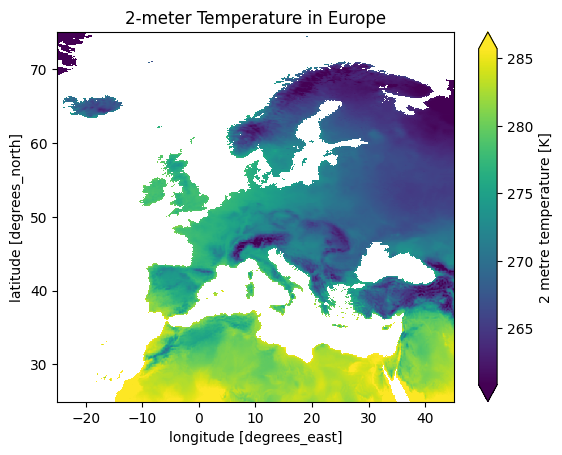

In [14]:
# Plotting a map for a specific time (for first time step)
ds_2.isel(time=0)['t2m'].plot.imshow(robust=True, cmap='viridis')
plt.title('2-meter Temperature in Europe')
plt.show()

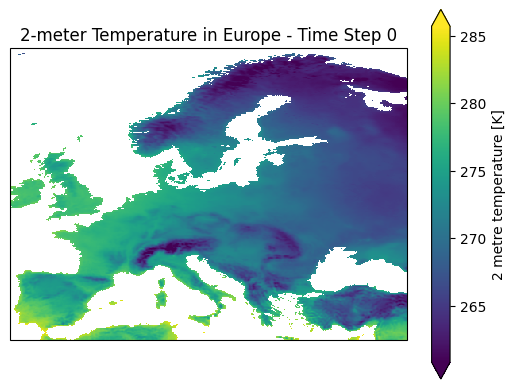

In [15]:
# Select a specific time step
time_step = 0
data_slice = ds_2['t2m'].isel(time=time_step)

# Plotting a map centered on Europe
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
data_slice.plot.imshow(robust=True, cmap='viridis', ax=ax, transform=ccrs.PlateCarree())

# Set the extent to cover Europe
ax.set_extent([-10, 40, 35, 70])  # [lon_min, lon_max, lat_min, lat_max]

plt.title(f'2-meter Temperature in Europe - Time Step {time_step}')
plt.show()

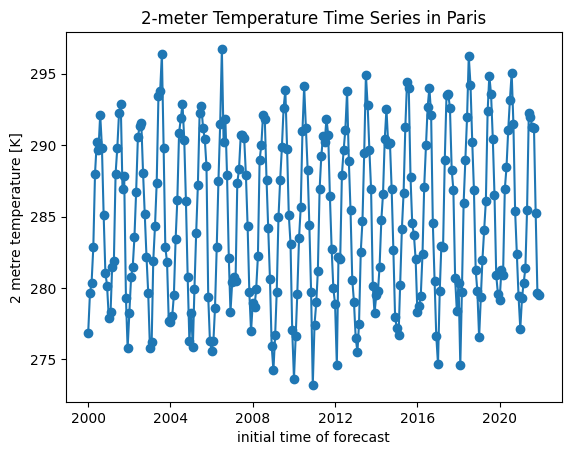

In [16]:
# Plotting a time series for a specific location: Paris
paris_t2m = ds_2.sel(latitude=48.8566, longitude=2.3522, method='nearest')['t2m']
paris_t2m.plot.line(marker='o')
plt.title('2-meter Temperature Time Series in Paris')
plt.show()

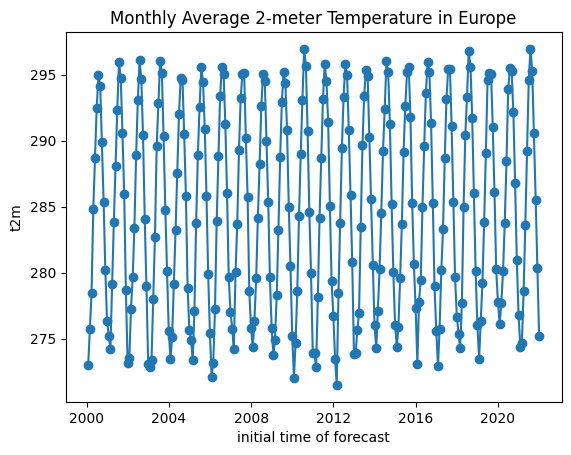

In [17]:
# Resampling to monthly frequency and calculating the mean
monthly_avg = ds_2['t2m'].mean(dim=['latitude', 'longitude']).resample(time='1M').mean(dim='time')

# Plotting the monthly average time series
monthly_avg.plot.line(marker='o')
plt.title('Monthly Average 2-meter Temperature in Europe')
plt.show()

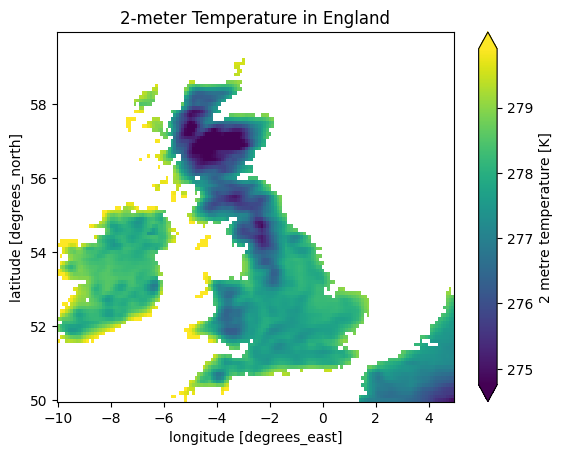

In [18]:
# Selecting a region over England
england_temp = ds_2['t2m'].sel(latitude=slice(60, 50), longitude=slice(-10, 5))

# Display the result as a map for a specific time step (first time step)
england_temp.isel(time=0).plot.imshow(robust=True, cmap='viridis')
plt.title('2-meter Temperature in England')
plt.show()

In [19]:
ds=ds_2
# Define the scale factors and corresponding settings
scale_factors = [2.5, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
settings = [
    (0.5, 2, 73, 144, 2),
    (1, 2, 181, 360, 2),
    (0.5, 3, 361, 720, 3),
    (0.25, 2, 721, 1440, 5),
    (0.1, 3, 1801, 3600, 5),
    (0.05, 6, 3601, 7200, 6),
    (0.025, 10, 7201, 14400, 9),
    (0.01, 12, 18001, 36000, 12),
    (1, 37, 72, 3, 0.93),
    (2.5, 2, 73, 144, 4),
    (1, 3, 181, 360, 5),
    (0.5, 5, 361, 720, 7),
    (0.25, 9, 721, 1440, 10),
    (0.1, 12, 1801, 3600, 12),
    (0.05, 20, 3601, 7200, 18),
    (0.025, 30, 7201, 14400, 30)
]

In [20]:
# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=[
    'Scale Factor', 'Settings', 'Dimensions', 'Size (GB)'
])

In [21]:
# Iterate over scale factors and settings
for scale_factor, setting in zip(scale_factors, settings):
    spatial_resolution, years, altitudes, latitude, longitude = setting
    time = 1
    altitude_direction = 2

    # Extract information from the ERA5 dataset
    longitude_values = ds['longitude'].values[:longitude]
    latitude_values = ds['latitude'].values[:latitude]
    #level_values = ds['level'].values[:altitudes]
    #pressure_level_values = ds['level'].values[:altitudes]
    temperature_values = ds['t2m'].values[:time, :latitude, :longitude]
    time_values = ds['time'].values

    # Calculate Size (GB)
    size_gb = (
        spatial_resolution * spatial_resolution * years * altitudes *
        latitude * longitude * time * altitude_direction / scale_factor
    )

    # Append the result to the DataFrame
    result_df = pd.concat([result_df, pd.DataFrame([{
        'Scale Factor': scale_factor,
        'Settings': setting,
        'Dimensions': f"{latitude} x {longitude} x {time} x {altitudes}",
        'Size (GB)': size_gb,
        'Longitude': longitude_values,
        'Latitude': latitude_values,
        #'Level': level_values,
        #'Pressure Level': pressure_level_values,
        'Temperature': temperature_values,
        'Time': time_values
    }])], ignore_index=True)

# Print the result DataFrame
result_df.head(10)

C:\Users\prote\AppData\Local\Temp\ipykernel_16076\1959621667.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame([{


,Scale Factor,Settings,Dimensions,Size (GB),Longitude,Latitude,Temperature,Time
0,2.5,"(0.5, 2, 73, 144, 2)",144 x 2 x 1 x 73,8409.600000,"[-25.0, -24.9]","[75.0, 74.9, 74.80000000000001, 74.70000000000...","[[[246.52138, 246.62685], [247.0038, 247.0663]...","[2000-01-01T00:00:00.000000000, 2000-02-01T00:..."
1,10.0,"(1, 2, 181, 360, 2)",360 x 2 x 1 x 181,52128.000000,"[-25.0, -24.9]","[75.0, 74.9, 74.80000000000001, 74.70000000000...","[[[246.52138, 246.62685], [247.0038, 247.0663]...","[2000-01-01T00:00:00.000000000, 2000-02-01T00:..."
2,100.0,"(0.5, 3, 361, 720, 3)",720 x 3 x 1 x 361,11696.400000,"[-25.0, -24.9, -24.799999999999997]","[75.0, 74.9, 74.80000000000001, 74.70000000000...","[[[246.52138, 246.62685, 246.72646], [247.0038...","[2000-01-01T00:00:00.000000000, 2000-02-01T00:..."
3,1000.0,"(0.25, 2, 721, 1440, 5)",1440 x 5 x 1 x 721,1297.800000,"[-25.0, -24.9, -24.799999999999997, -24.699999...","[75.0, 74.9, 74.80000000000001, 74.70000000000...","[[[246.52138, 246.62685, 246.72646, 246.78896,...","[2000-01-01T00:00:00.000000000, 2000-02-01T00:..."
4,10000.0,"(0.1, 3, 1801, 3600, 5)",3600 x 5 x 1 x 1801,194.508000,"[-25.0, -24.9, -24.799999999999997, -24.699999...","[75.0, 74.9, 74.80000000000001, 74.70000000000...","[[[246.52138, 246.62685, 246.72646, 246.78896,...","[2000-01-01T00:00:00.000000000, 2000-02-01T00:..."
5,100000.0,"(0.05, 6, 3601, 7200, 6)",7200 x 6 x 1 x 3601,46.668960,"[-25.0, -24.9, -24.799999999999997, -24.699999...","[75.0, 74.9, 74.80000000000001, 74.70000000000...","[[[246.52138, 246.62685, 246.72646, 246.78896,...","[2000-01-01T00:00:00.000000000, 2000-02-01T00:..."
6,1000000.0,"(0.025, 10, 7201, 14400, 9)",14400 x 9 x 1 x 7201,11.665620,"[-25.0, -24.9, -24.799999999999997, -24.699999...","[75.0, 74.9, 74.80000000000001, 74.70000000000...","[[[246.52138, 246.62685, 246.72646, 246.78896,...","[2000-01-01T00:00:00.000000000, 2000-02-01T00:..."
7,10000000.0,"(0.01, 12, 18001, 36000, 12)",36000 x 12 x 1 x 18001,1.866344,"[-25.0, -24.9, -24.799999999999997, -24.699999...","[75.0, 74.9, 74.80000000000001, 74.70000000000...","[[[246.52138, 246.62685, 246.72646, 246.78896,...","[2000-01-01T00:00:00.000000000, 2000-02-01T00:..."


# Defining Parameterized Queries

Temporal Range Selection and Aggregation

In [22]:
def temporal_range_aggregation(ds, start_date, end_date, variable='t2m', operation='mean'):
    """
    Selects data within a time range and performs an aggregation operation.
    
    Args:
    ds (xarray.Dataset): The dataset.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    variable (str): The variable to aggregate.
    operation (str): The aggregation operation ('mean', 'sum', etc.).
    
    Returns:
    xarray.DataArray: The aggregated data.
    """
    subset = ds.sel(time=slice(start_date, end_date))
    if operation == 'mean':
        return subset[variable].mean(dim='time')
    elif operation == 'sum':
        return subset[variable].sum(dim='time')
    else:
        raise ValueError(f"Unsupported operation '{operation}'. Only 'mean' and 'sum' are supported.")


In [23]:
# Assuming 'ds' is the loaded Xarray dataset containing the ERA5 data
aggregated_result = temporal_range_aggregation(
    ds=ds_2,  # Use the dataset variable name you have loaded the data into
    start_date='2020-01-01',
    end_date='2020-01-31',
    variable='t2m',  
    operation='mean'
)

print(aggregated_result)




<xarray.DataArray 't2m' (latitude: 501, longitude: 701)>
array([[245.04782, 245.10837, 245.1611 , ...,       nan,       nan,
              nan],
       [245.41501, 245.46384, 245.51266, ...,       nan,       nan,
              nan],
       [245.87009, 245.92868, 245.98141, ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ..., 285.40524, 285.40915,
        285.45798],
       [      nan,       nan,       nan, ..., 285.53806, 285.43454,
        285.499  ],
       [      nan,       nan,       nan, ..., 285.62204, 285.49118,
        285.49118]], dtype=float32)
Coordinates:
    number     int32 0
    step       timedelta64[ns] 1 days
    surface    float64 0.0
  * latitude   (latitude) float64 75.0 74.9 74.8 74.7 ... 25.3 25.2 25.1 25.0
  * longitude  (longitude) float64 -25.0 -24.9 -24.8 -24.7 ... 44.8 44.9 45.0


In [25]:
# aggregated_result.plot()

Spatial Subset Extraction

In [27]:
def spatial_subset_extraction(ds, lat_range, lon_range, variable='t2m'):
    """
    Extracts a spatial subset from the dataset.
    
    Args:
    ds (xarray.Dataset): The dataset.
    lat_range (tuple): Latitude range (min_lat, max_lat).
    lon_range (tuple): Longitude range (min_lon, max_lon).
    variable (str): Variable to extract.
    
    Returns:
    xarray.DataArray: The spatial subset.
    """
    subset = ds.sel(latitude=slice(*lat_range), longitude=slice(*lon_range))[variable]
    return subset


Temporal Data Modification

In [ ]:
def temporal_data_modification(ds, start_date, end_date, variable='t2m', new_value=0):
    """
    Modifies data values within a specified time range.
    
    Args:
    ds (xarray.Dataset): The dataset.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    variable (str): The variable to modify.
    new_value (numeric): The new value to assign.
    
    Returns:
    xarray.Dataset: The dataset with modified values.
    """
    ds[variable].loc[dict(time=slice(start_date, end_date))] = new_value
    return ds


Adding a Derived Variable

In [ ]:
def add_derived_variable(ds, base_variable='t2m', new_variable='t2m_anomaly', reference_period=('2000-01-01', '2020-12-31')):
    """
    Adds a derived variable to the dataset, e.g., temperature anomaly.
    
    Args:
    ds (xarray.Dataset): The dataset.
    base_variable (str): Base variable to derive from.
    new_variable (str): Name for the new derived variable.
    reference_period (tuple): Period to calculate the reference mean (start_date, end_date).
    
    Returns:
    xarray.Dataset: The dataset with the new derived variable.
    """
    reference_mean = ds[base_variable].sel(time=slice(*reference_period)).mean(dim='time')
    ds[new_variable] = ds[base_variable] - reference_mean
    return ds


Seasonal Aggregation

In [ ]:
def seasonal_aggregation(ds, variable='t2m', season='DJF', operation='mean'):
    """
    Calculates seasonal aggregation (mean or sum) for a specified variable.
    
    Args:
    ds (xarray.Dataset): The dataset.
    variable (str): The variable to aggregate.
    season (str): Season code ('DJF', 'MAM', 'JJA', 'SON').
    operation (str): The aggregation operation ('mean', 'sum').
    
    Returns:
    xarray.DataArray: The seasonal aggregated data.
    """
    ds_seasonal = ds[variable].groupby('time.season').apply(lambda x: x.mean(dim='time') if operation == 'mean' else x.sum(dim='time'))
    return ds_seasonal.sel(season=season)


Combined Spatial and Temporal Subsetting with Aggregation

In [ ]:
def combined_spatial_temporal_aggregation(ds, start_date, end_date, lat_range, lon_range, variable='t2m', operation='mean'):
    """
    Performs a combined spatial and temporal subsetting on the dataset and then computes an aggregation.
    
    Args:
    ds (xarray.Dataset): The dataset.
    start_date (str): Start date of the temporal range in 'YYYY-MM-DD' format.
    end_date (str): End date of the temporal range in 'YYYY-MM-DD' format.
    lat_range (tuple): Latitude range (min_lat, max_lat) for spatial subsetting.
    lon_range (tuple): Longitude range (min_lon, max_lon) for spatial subsetting.
    variable (str): The variable to perform the operation on.
    operation (str): The aggregation operation ('mean', 'sum', etc.).
    
    Returns:
    xarray.DataArray: The result of the aggregation operation on the spatial-temporal subset.
    """
    # Perform temporal subsetting
    temporal_subset = ds.sel(time=slice(start_date, end_date))
    
    # Perform spatial subsetting on the temporal subset
    spatial_temporal_subset = temporal_subset.sel(latitude=slice(*lat_range), longitude=slice(*lon_range))
    
    # Perform the specified aggregation operation
    if operation == 'mean':
        result = spatial_temporal_subset[variable].mean(dim=['time', 'latitude', 'longitude'])
    elif operation == 'sum':
        result = spatial_temporal_subset[variable].sum(dim=['time', 'latitude', 'longitude'])
    else:
        raise ValueError("Unsupported operation. Choose either 'mean' or 'sum'.")
    
    return result
